In [158]:
#!pip install scikit-plot
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [159]:
df = pd.read_csv("songs_df.csv")


In [160]:
df.columns


Index(['name', 'artist', 'popularity', 'id', 'label', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [161]:
df["label"].value_counts()


pop      506
metal    482
jazz     390
rap      324
Name: label, dtype: int64

In [162]:
labels = ["pop", "metal", "jazz", "rap"]


In [163]:
subset = df.loc[df["label"].isin(labels), :]


<AxesSubplot:xlabel='label', ylabel='popularity'>

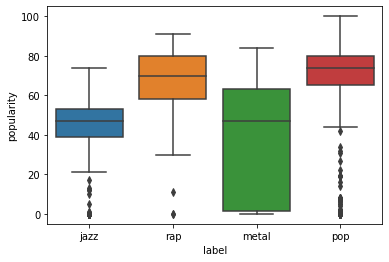

In [164]:
sns.boxplot(data=subset, x="label", y="popularity")


In [165]:
features = ['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence',  'duration_ms']
target = "label"


In [166]:
X = subset[features]
y = subset[target]


In [167]:
scaler = StandardScaler()
#label_encoder = LabelEncoder()


In [168]:
#y = label_encoder.fit(y).transform(y)


In [169]:
sum(y == 0)/len(y)


0.0

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, stratify=y, shuffle=True)


In [171]:
# aqui estamos apenas transformando os dados... ainda não é o modelo
scaler = StandardScaler()
scaler.fit(X_train)  # primeiro eu "treino" meu scaler
X_train = scaler.transform(X_train)  # transformo meus dados
X_test = scaler.transform(X_test)


In [172]:
clf = DecisionTreeClassifier(max_depth=3)


In [173]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)


[Text(837.0, 1426.95, 'acousticness <= 0.805\ngini = 0.743\nsamples = 100.0%\nvalue = [0.229, 0.283, 0.298, 0.19]\nclass = jazz'),
 Text(418.5, 1019.25, 'energy <= 0.88\ngini = 0.677\nsamples = 75.2%\nvalue = [0.031, 0.376, 0.349, 0.244]\nclass = metal'),
 Text(209.25, 611.55, 'speechiness <= -0.143\ngini = 0.645\nsamples = 50.8%\nvalue = [0.046, 0.143, 0.452, 0.359]\nclass = jazz'),
 Text(104.625, 203.8499999999999, 'gini = 0.534\nsamples = 31.2%\nvalue = [0.073, 0.214, 0.64, 0.073]\nclass = jazz'),
 Text(313.875, 203.8499999999999, 'gini = 0.311\nsamples = 19.5%\nvalue = [0.004, 0.03, 0.15, 0.816]\nclass = rap'),
 Text(627.75, 611.55, 'popularity <= 0.891\ngini = 0.244\nsamples = 24.5%\nvalue = [0.0, 0.859, 0.135, 0.006]\nclass = metal'),
 Text(523.125, 203.8499999999999, 'gini = 0.14\nsamples = 22.4%\nvalue = [0.0, 0.925, 0.072, 0.003]\nclass = metal'),
 Text(732.375, 203.8499999999999, 'gini = 0.304\nsamples = 2.1%\nvalue = [0.0, 0.143, 0.821, 0.036]\nclass = jazz'),
 Text(1255.5, 

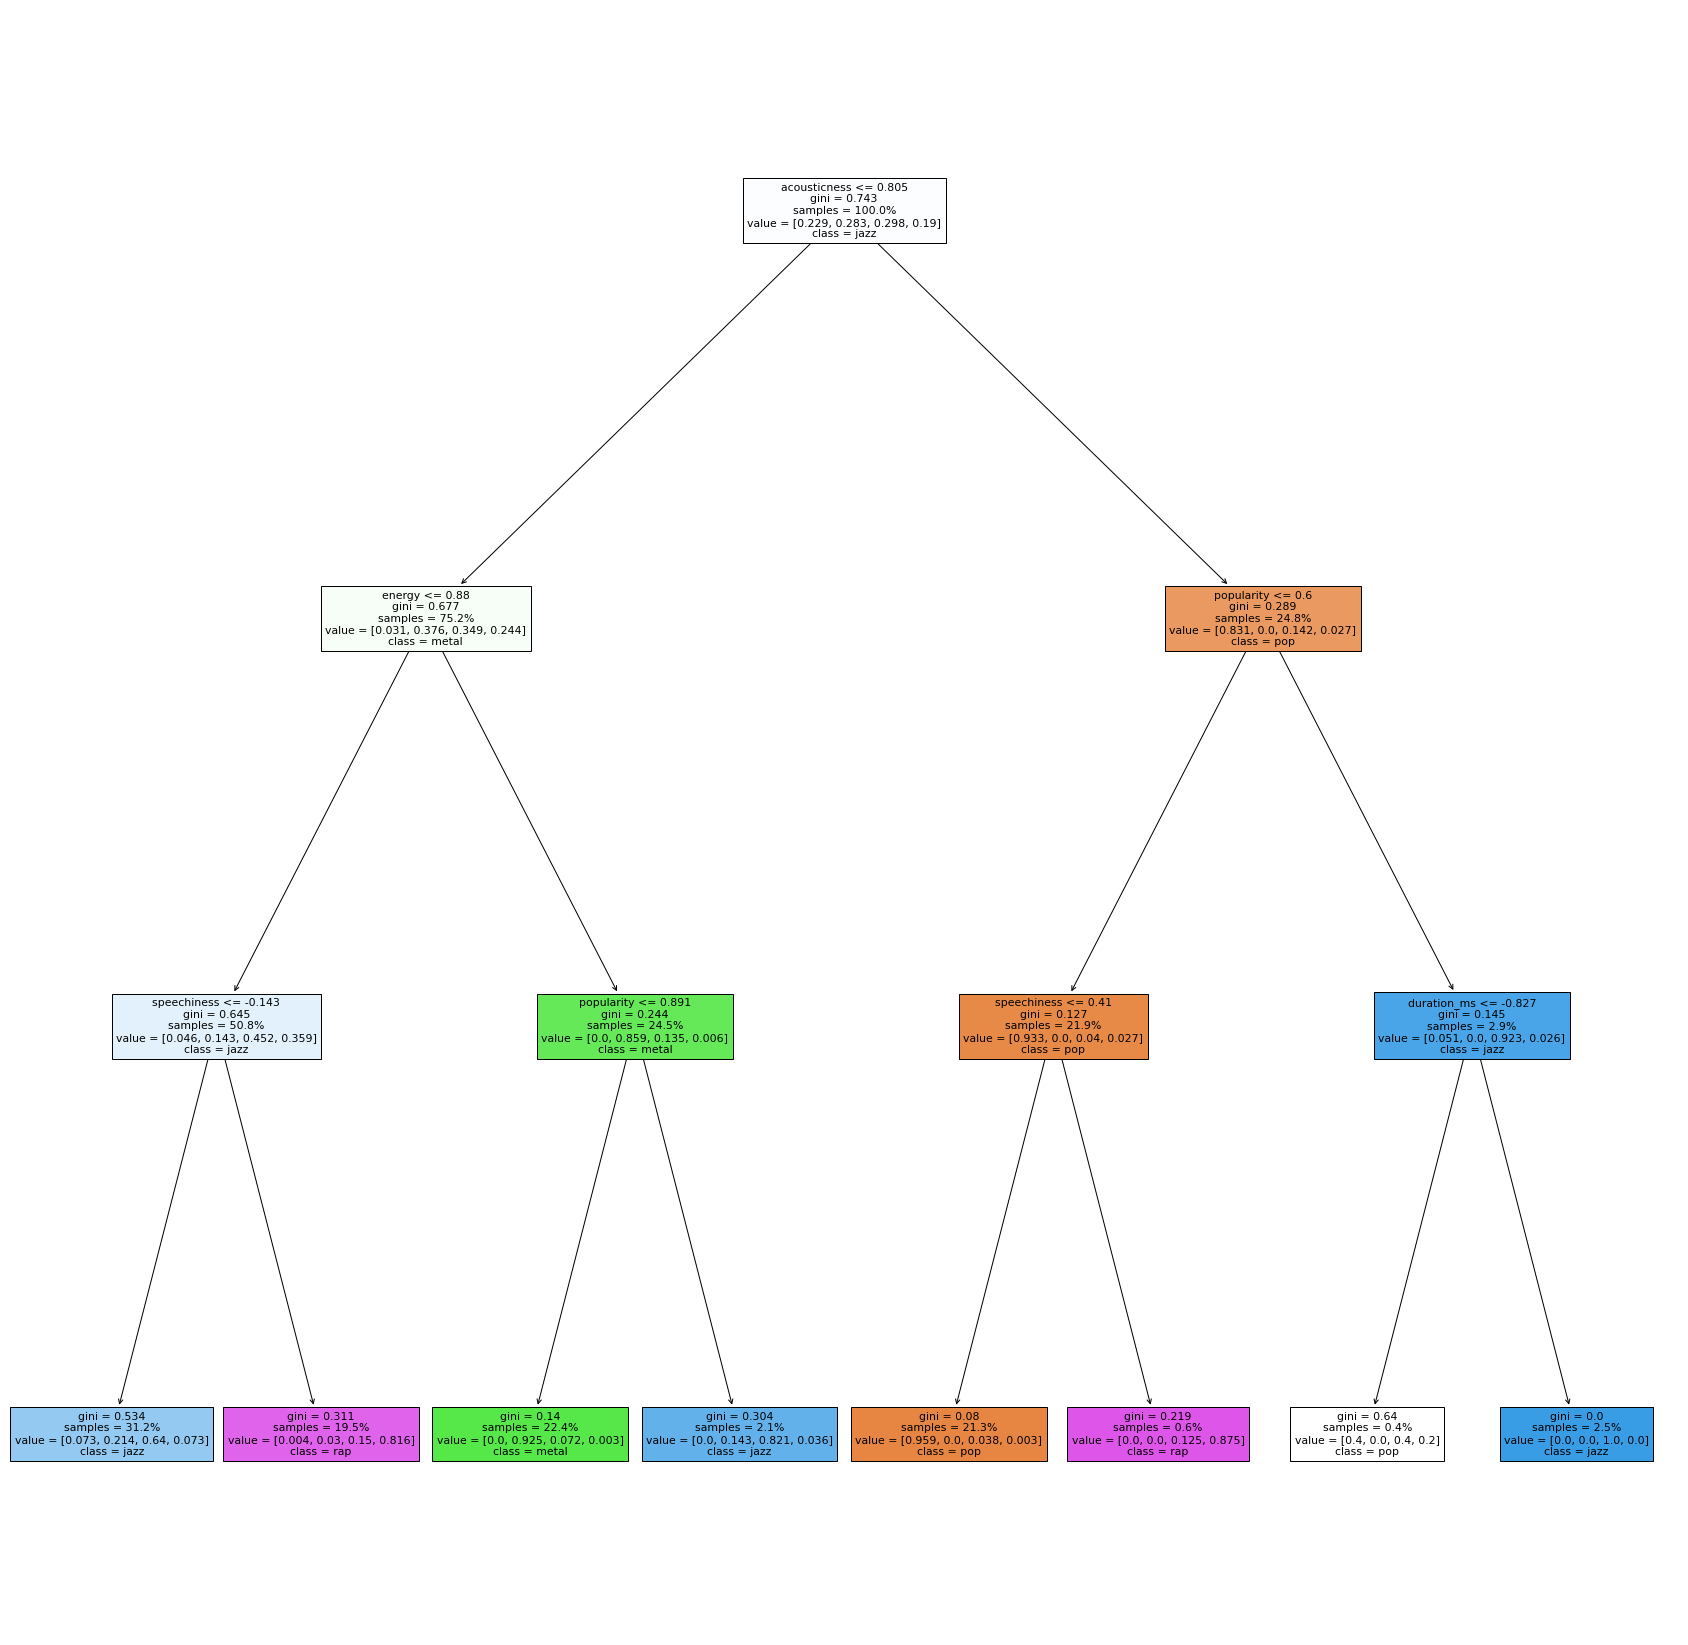

In [174]:
# plota a decisão/arvore de decisão
fig = plt.figure(figsize=(30, 30))
plot_tree(clf, feature_names=features, class_names=labels,
          filled=True, proportion=True)


In [175]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        jazz       0.94      0.87      0.91        78
       metal       0.89      0.75      0.82        97
         pop       0.66      0.73      0.69       101
         rap       0.68      0.78      0.73        65

    accuracy                           0.78       341
   macro avg       0.79      0.79      0.79       341
weighted avg       0.79      0.78      0.78       341



In [176]:
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

        jazz       0.95      0.90      0.92       312
       metal       0.92      0.73      0.82       385
         pop       0.68      0.81      0.74       405
         rap       0.82      0.86      0.84       259

    accuracy                           0.82      1361
   macro avg       0.84      0.83      0.83      1361
weighted avg       0.84      0.82      0.82      1361



In [177]:
confusion_matrix(y_test, y_pred)


array([[68,  0,  6,  4],
       [ 1, 73, 21,  2],
       [ 2,  7, 74, 18],
       [ 1,  2, 11, 51]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

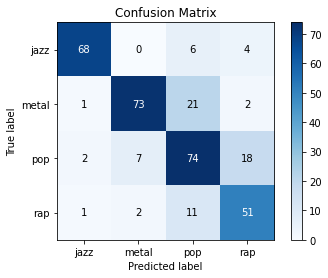

In [178]:
plot_confusion_matrix(y_test, y_pred)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

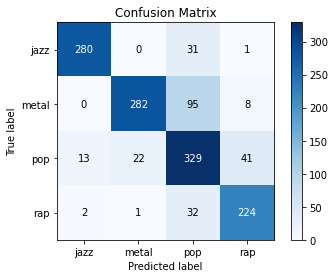

In [179]:
plot_confusion_matrix(y_train, y_pred_train)


In [180]:
X_train.shape


(1361, 11)

# Random Forest

In [181]:
clf = RandomForestClassifier(n_estimators=75, max_depth=6, max_features=.8, max_samples=.8, random_state=12345)


In [182]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)


In [183]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        jazz       0.97      0.95      0.96        78
       metal       0.96      0.94      0.95        97
         pop       0.80      0.86      0.83       101
         rap       0.84      0.78      0.81        65

    accuracy                           0.89       341
   macro avg       0.89      0.88      0.89       341
weighted avg       0.89      0.89      0.89       341



In [184]:
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

        jazz       0.98      0.97      0.98       312
       metal       0.97      0.95      0.96       385
         pop       0.88      0.93      0.90       405
         rap       0.94      0.90      0.92       259

    accuracy                           0.94      1361
   macro avg       0.94      0.94      0.94      1361
weighted avg       0.94      0.94      0.94      1361



In [185]:
pd.DataFrame(zip(features, clf.feature_importances_), columns=[
             "feature", "score"]).sort_values("score", ascending=False)


,feature,score
6,acousticness,0.305386
2,energy,0.181855
5,speechiness,0.169507
0,popularity,0.092952
1,danceability,0.084606
3,loudness,0.058289
10,duration_ms,0.052513
7,instrumentalness,0.030282
9,valence,0.014433
8,liveness,0.008048


# Logistic Regression

In [188]:
clf = LogisticRegression()

In [189]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)